<a href="https://colab.research.google.com/github/Satish-Kumar-1/Basic-Cat-vs-Dog-Classifier-Using-CNN/blob/main/Implementation_of_CNN_from_scratch_on_CAT_vs_Dog_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the dataset from Kaggle using Json api


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"satishkumar0912","key":"dc71fffb70f2b880d42ad5a523a03bfc"}'}

In [ ]:
## import the dataset  from kaggle

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:51<00:00, 22.0MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.2MB/s]


In [ ]:
!unzip /content/dogs-vs-cats.zip -d/content

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

## Installing the required libraries

In [ ]:
# !pip3 install tensorflow numpy matplotlib keras

## Importing the required packages

In [ ]:
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img



from PIL import Image



In [ ]:
random.sample(os.listdir('/content/train/dogs'), 5)

['dog.10921.jpg',
 'dog.6683.jpg',
 'dog.10614.jpg',
 'dog.7167.jpg',
 'dog.10183.jpg']

In [ ]:
def plot_images_from_directory(directory_path, class_animal, num_images = 9):
    image_filenames = os.listdir(directory_path)

    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, dsplaying them all.")
        num_images = len(image_filenames)

    selected_images = random.sample(image_filenames, num_images)

    fig, axes = plt.subplots(3, 3, figsize = (8,8))
    axes =  axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path =  os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_animal}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

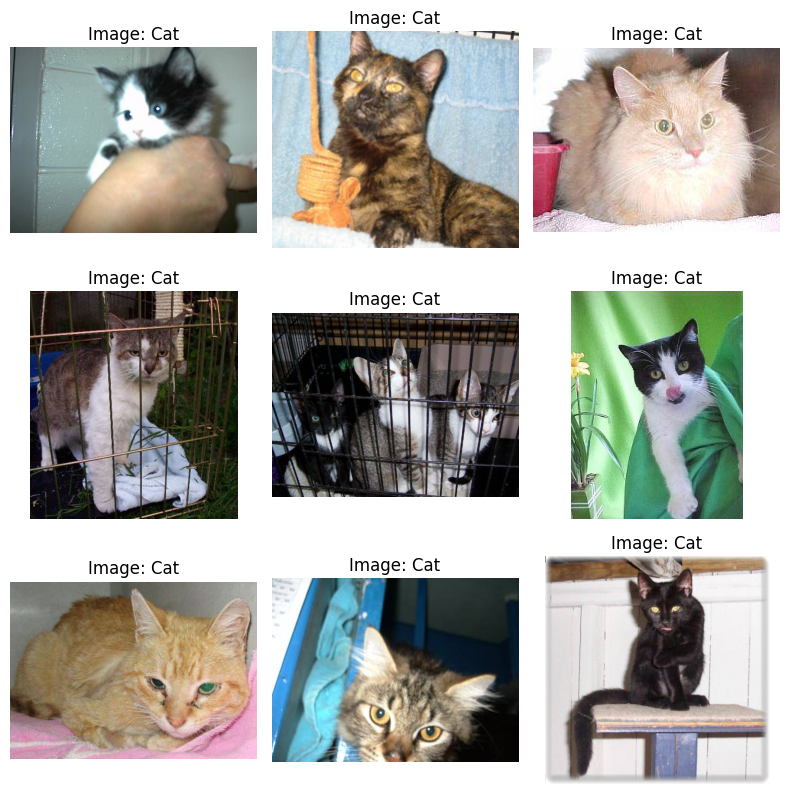

In [ ]:
cat_directory_path = '/content/dogs_vs_cats/train/cats'
plot_images_from_directory(cat_directory_path, class_animal = 'Cat')

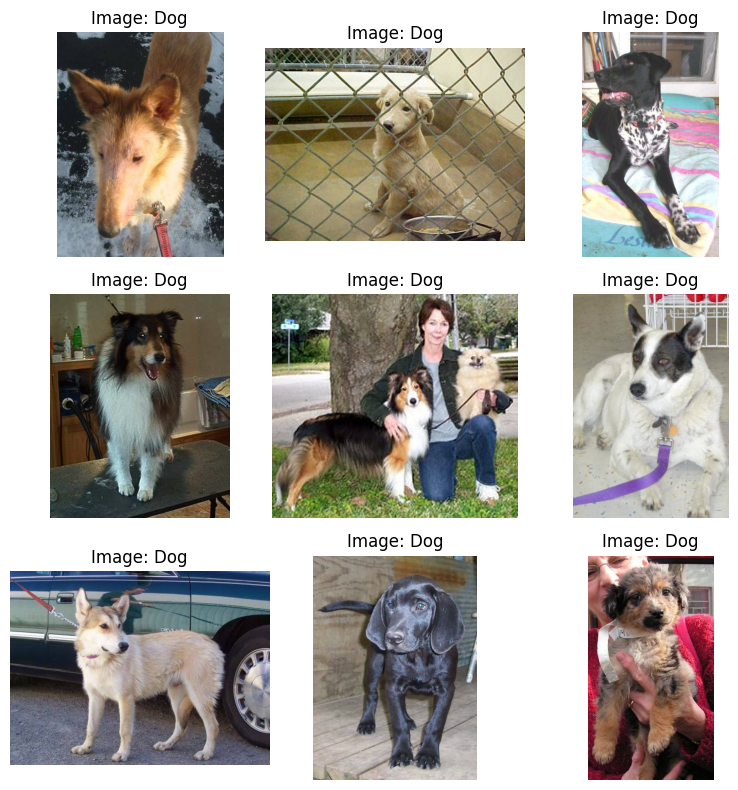

In [ ]:
dog_directory_path = '/content/dogs_vs_cats/train/dogs'
plot_images_from_directory(dog_directory_path, class_animal = 'Dog')

## Data Analysis

In [ ]:
cat_images =  os.listdir(cat_directory_path)
dog_images =  os.listdir(dog_directory_path)

classes_animals = ['Cats' , 'Dogs']
count = [len(cat_images), len(dog_images)]

print(count)

[10000, 10000]


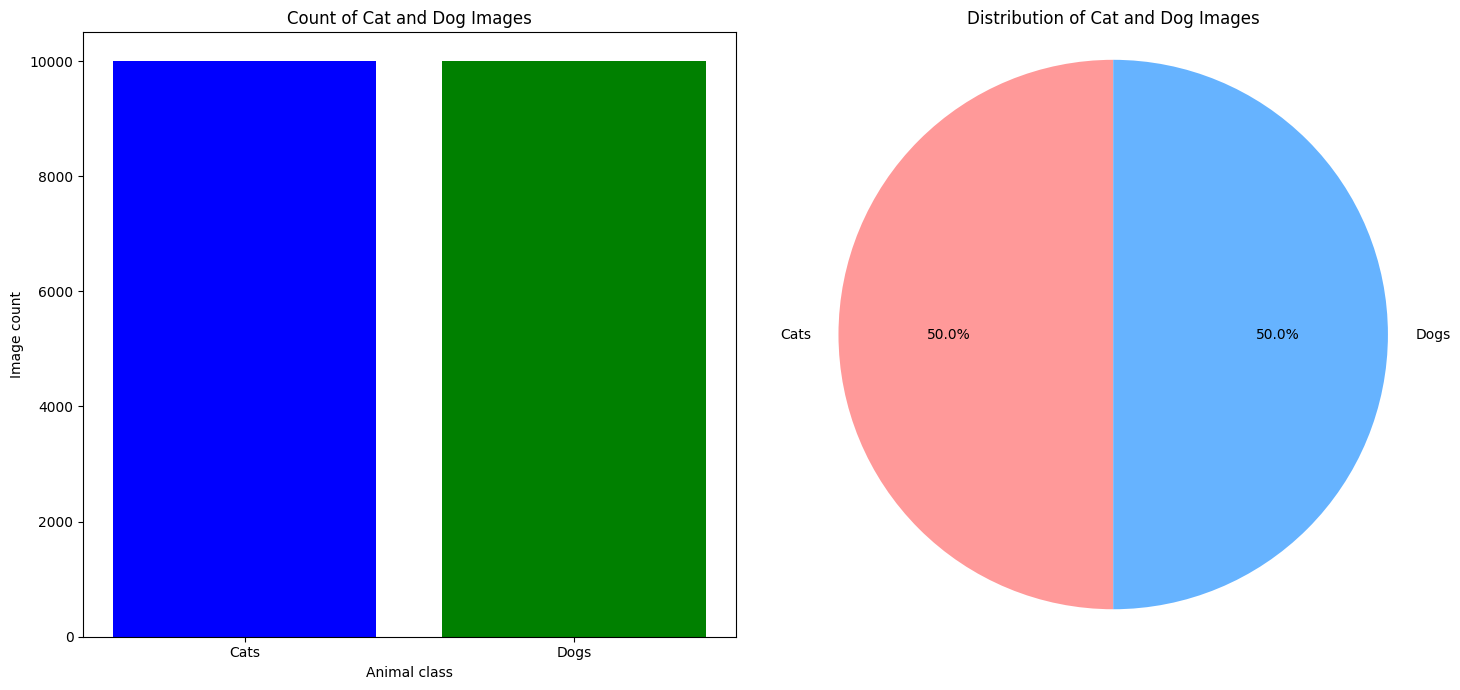

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,7))

ax[0].bar(classes_animals, count, color=['blue' , 'green'])
ax[0].set_xlabel('Animal class')
ax[0].set_ylabel('Image count')
ax[0].set_title('Count of Cat and Dog Images')

colors = ['#ff9999' , '#66b3ff']
ax[1].pie(count, labels = classes_animals, colors = colors, autopct = '%1.1f%%', startangle = 90)
ax[1].set_title('Distribution of Cat and Dog Images')
ax[1].axis('equal')

plt.tight_layout()
plt.show()




# Removing the corrupted images

In [ ]:
import os
import cv2
import imghdr

In [ ]:
image_exts = ['jpeg' , 'jpg' , 'png']

data_dir = '/content/dogs_vs_cats'

for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)

        try:
            file_type = imghdr.what(file_path)

            if file_type not in image_exts:
                print(f'Image not in existing list {file_path}')
                os.remove(file_path)
            else:
                img = cv2.imread(file_path)

        except Exception as e:
            print(f'Issure with the file {file_path}.Error: {e}')
            os.remove(file_path)


#Loading shpaes and channels

In [ ]:
def image_to_array(image_path):
    try:
        with Image.open(image_path) as img:
            image_array = np.array(img)
            return image_array
    except IOError:
        print(f'Could not read the image file at {image_path}.')
        return None

array([[[93, 57, 43],
        [96, 60, 44],
        [99, 63, 47],
        ...,
        [33, 14,  7],
        [34, 15,  8],
        [34, 15,  8]],

       [[90, 54, 40],
        [93, 57, 41],
        [96, 60, 44],
        ...,
        [36, 18,  8],
        [36, 17, 10],
        [37, 19,  9]],

       [[86, 50, 36],
        [90, 54, 38],
        [93, 57, 41],
        ...,
        [41, 21, 10],
        [41, 21, 12],
        [42, 22, 11]],

       ...,

       [[27, 25, 49],
        [26, 24, 48],
        [23, 21, 45],
        ...,
        [48, 21, 10],
        [49, 21, 10],
        [47, 20,  9]],

       [[21, 19, 43],
        [20, 18, 42],
        [19, 17, 41],
        ...,
        [46, 22, 10],
        [48, 21, 10],
        [45, 21,  9]],

       [[17, 15, 39],
        [17, 15, 39],
        [17, 15, 39],
        ...,
        [42, 18,  6],
        [42, 18,  6],
        [42, 18,  6]]], dtype=uint8)
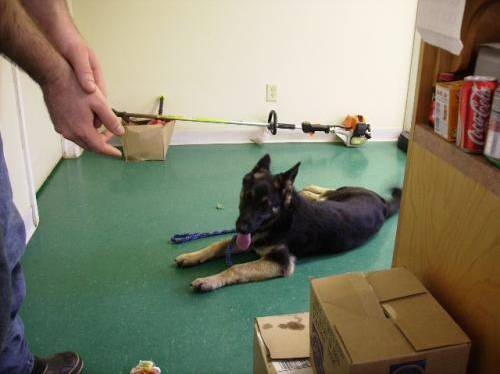

In [ ]:
image_to_array('/content/dogs_vs_cats/train/dogs/dog.10103.jpg')

In [ ]:
## Using CV2

image = '/content/dogs_vs_cats/train/dogs/dog.10103.jpg'

import cv2

img = cv2.imread(image)
if img is not None:
    print(img)
    print(img.shape)
else:
    print('The image could not be loaded')

[[[43 57 93]
  [44 60 96]
  [47 63 99]
  ...
  [ 7 14 33]
  [ 8 15 34]
  [ 8 15 34]]

 [[40 54 90]
  [41 57 93]
  [44 60 96]
  ...
  [ 8 18 36]
  [10 17 36]
  [ 9 19 37]]

 [[36 50 86]
  [38 54 90]
  [41 57 93]
  ...
  [10 21 41]
  [12 21 41]
  [11 22 42]]

 ...

 [[49 25 27]
  [48 24 26]
  [45 21 23]
  ...
  [10 21 48]
  [10 21 49]
  [ 9 20 47]]

 [[43 19 21]
  [42 18 20]
  [41 17 19]
  ...
  [10 22 46]
  [10 21 48]
  [ 9 21 45]]

 [[39 15 17]
  [39 15 17]
  [39 15 17]
  ...
  [ 6 18 42]
  [ 6 18 42]
  [ 6 18 42]]]
(374, 500, 3)


In [ ]:
## Using python

img_pil = Image.open(image)
img_array = np.array(img_pil)

print(img_array)

print(img_array.shape)

[[[93 57 43]
  [96 60 44]
  [99 63 47]
  ...
  [33 14  7]
  [34 15  8]
  [34 15  8]]

 [[90 54 40]
  [93 57 41]
  [96 60 44]
  ...
  [36 18  8]
  [36 17 10]
  [37 19  9]]

 [[86 50 36]
  [90 54 38]
  [93 57 41]
  ...
  [41 21 10]
  [41 21 12]
  [42 22 11]]

 ...

 [[27 25 49]
  [26 24 48]
  [23 21 45]
  ...
  [48 21 10]
  [49 21 10]
  [47 20  9]]

 [[21 19 43]
  [20 18 42]
  [19 17 41]
  ...
  [46 22 10]
  [48 21 10]
  [45 21  9]]

 [[17 15 39]
  [17 15 39]
  [17 15 39]
  ...
  [42 18  6]
  [42 18  6]
  [42 18  6]]]
(374, 500, 3)


## Lets build the CNN model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_dir = '/content/dogs_vs_cats/train'

train_datagen =  ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',
    subset = 'validation'
)


Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [ ]:
train_class_labels = train_generator.class_indices
print('Training class labels: ', train_class_labels)

Training class labels:  {'cats': 0, 'dogs': 1}


In [ ]:
validation_class_labels = validation_generator.class_indices
print(f"Validation class labels: ", validation_class_labels)

Validation class labels:  {'cats': 0, 'dogs': 1}


#Visulaizing the batch images

In [ ]:
images, labels = next(train_generator)
# images, labels

In [ ]:
import matplotlib.pyplot as plt
def plot_images_from_generator(generator, num_images = 4):
    images, labels = next(generator)

    fig, axes = plt.subplots(1, num_images, figsize = (20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img)

        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()


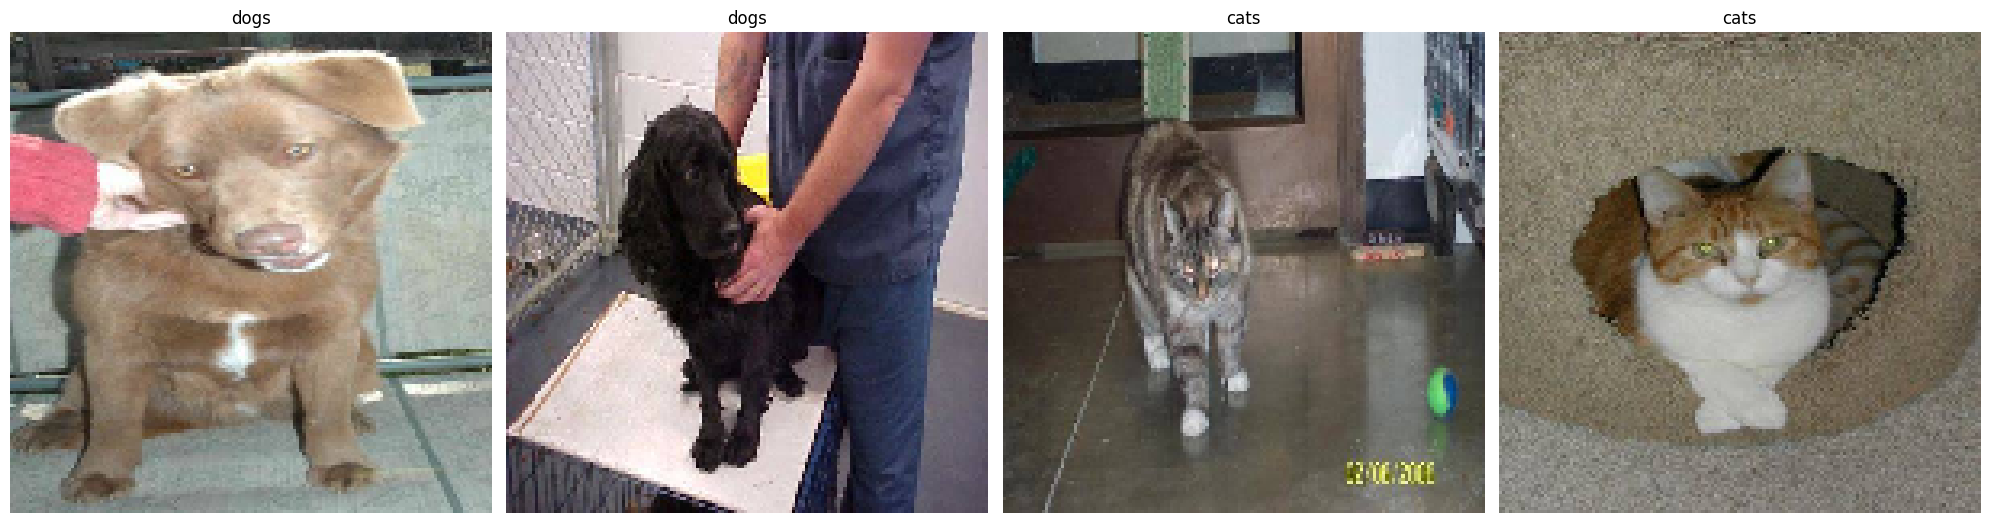

In [ ]:
plot_images_from_generator(train_generator, num_images=4)

In [ ]:
train_generator.reset()

## CNN model

In [ ]:
model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3, 3), activation = 'relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3, 3), activation = 'relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3, 3), activation = 'relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(512, activation = 'relu'),
        layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

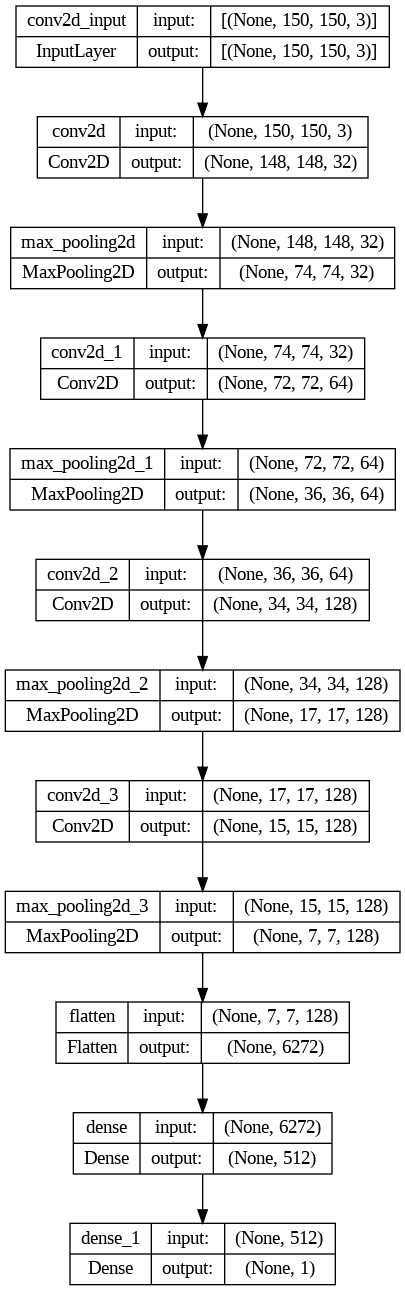

In [ ]:
plot_model(model, to_file = 'Architecture.png', show_shapes = True, show_layer_names = True)

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])


In [ ]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

800.0 200.0


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 800,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 200
)

Epoch 1/10
800/800 [==============================] - 49s 52ms/step - loss: 0.6254 - accuracy: 0.6364 - val_loss: 0.5809 - val_accuracy: 0.6727
Epoch 2/10
800/800 [==============================] - 43s 54ms/step - loss: 0.5058 - accuracy: 0.7494 - val_loss: 0.4793 - val_accuracy: 0.7685
Epoch 3/10
800/800 [==============================] - 42s 52ms/step - loss: 0.4266 - accuracy: 0.8031 - val_loss: 0.4300 - val_accuracy: 0.8058
Epoch 4/10
800/800 [==============================] - 41s 52ms/step - loss: 0.3567 - accuracy: 0.8394 - val_loss: 0.4037 - val_accuracy: 0.8205
Epoch 5/10
800/800 [==============================] - 40s 49ms/step - loss: 0.2932 - accuracy: 0.8759 - val_loss: 0.3606 - val_accuracy: 0.8462
Epoch 6/10
800/800 [==============================] - 61s 77ms/step - loss: 0.2259 - accuracy: 0.9055 - val_loss: 0.4051 - val_accuracy: 0.8425
Epoch 7/10
800/800 [==============================] - 51s 63ms/step - loss: 0.1669 - accuracy: 0.9329 - val_loss: 0.3683 - val_accuracy:

In [ ]:
history.history

{'loss': [0.6254241466522217,
  0.5058266520500183,
  0.4266434609889984,
  0.3566664457321167,
  0.29323744773864746,
  0.22585590183734894,
  0.16689914464950562,
  0.11786990612745285,
  0.07239757478237152,
  0.06341676414012909],
 'accuracy': [0.6363750100135803,
  0.7494375109672546,
  0.8030624985694885,
  0.8393750190734863,
  0.8758749961853027,
  0.9054999947547913,
  0.9328749775886536,
  0.9558749794960022,
  0.9735000133514404,
  0.9763749837875366],
 'val_loss': [0.5809125304222107,
  0.4793497920036316,
  0.4299590587615967,
  0.40368878841400146,
  0.3605763614177704,
  0.4050634503364563,
  0.3682705760002136,
  0.4498864412307739,
  0.5909850001335144,
  0.5409267544746399],
 'val_accuracy': [0.6727499961853027,
  0.7684999704360962,
  0.8057500123977661,
  0.8205000162124634,
  0.8462499976158142,
  0.8424999713897705,
  0.862500011920929,
  0.8514999747276306,
  0.8517500162124634,
  0.8479999899864197]}

Text(0.5, 1.0, 'Training and Validation Loss')

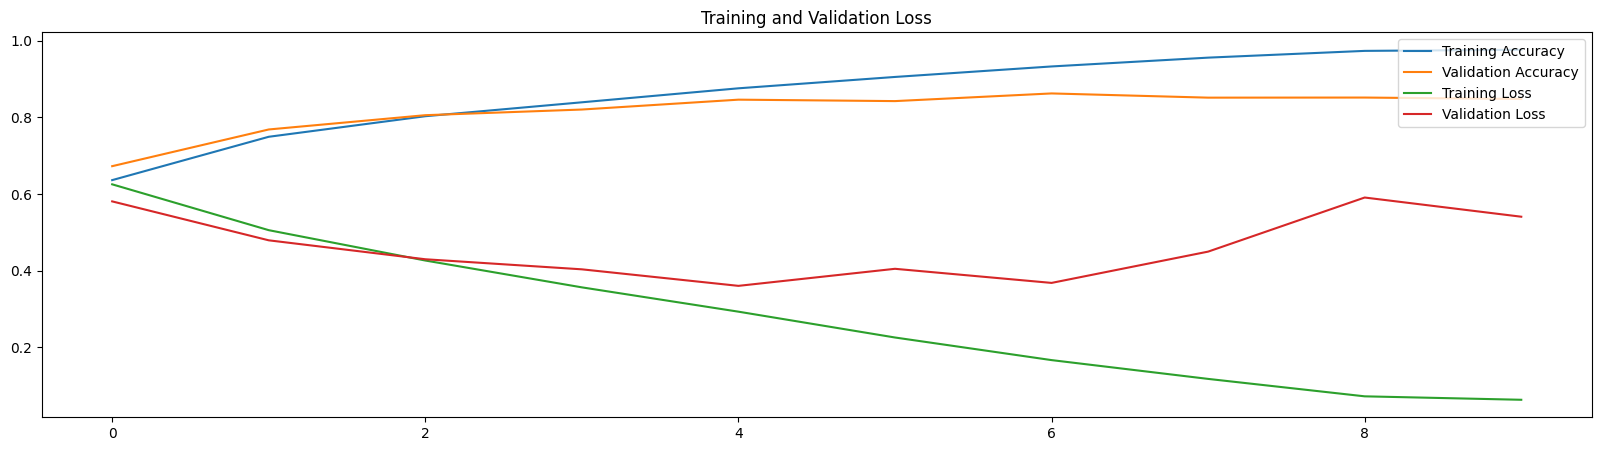

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure (figsize = (20,5))
plt.subplot = (1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation accuracy')

# plt.figure = (figsize = (20,5))
plt.subplot = (1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')


## Model Evaluation

In [ ]:
## Initializing the test generator

test_datagen = ImageDataGenerator(rescale = 1./255)

test_dir = '/content/dogs_vs_cats/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',
    shuffle = False
)

Found 5000 images belonging to 2 classes.


## Making Test Predictions

In [ ]:
np.ceil(test_generator.samples/test_generator.batch_size)

250.0

In [ ]:
probabilities = model.predict(test_generator, steps = np.ceil(test_generator.samples/test_generator.batch_size))
probabilities

250/250 [==============================] - 11s 43ms/step


array([[1.8595761e-10],
       [2.6494217e-07],
       [9.8625416e-05],
       ...,
       [9.9999785e-01],
       [4.2216837e-01],
       [7.4397486e-01]], dtype=float32)

In [ ]:
test_generator.reset()

In [ ]:
true_classes = test_generator.classes
probabilities = model.predict(test_generator, steps = np.ceil(test_generator.samples/test_generator.batch_size))

predicted_classes = (probabilities > 0.5).astype(int).squeeze()

class_labels = list(test_generator.class_indices.keys())
predicted_classes

250/250 [==============================] - 10s 38ms/step


array([0, 0, 0, ..., 1, 0, 1])

## Plotting confusion matrix

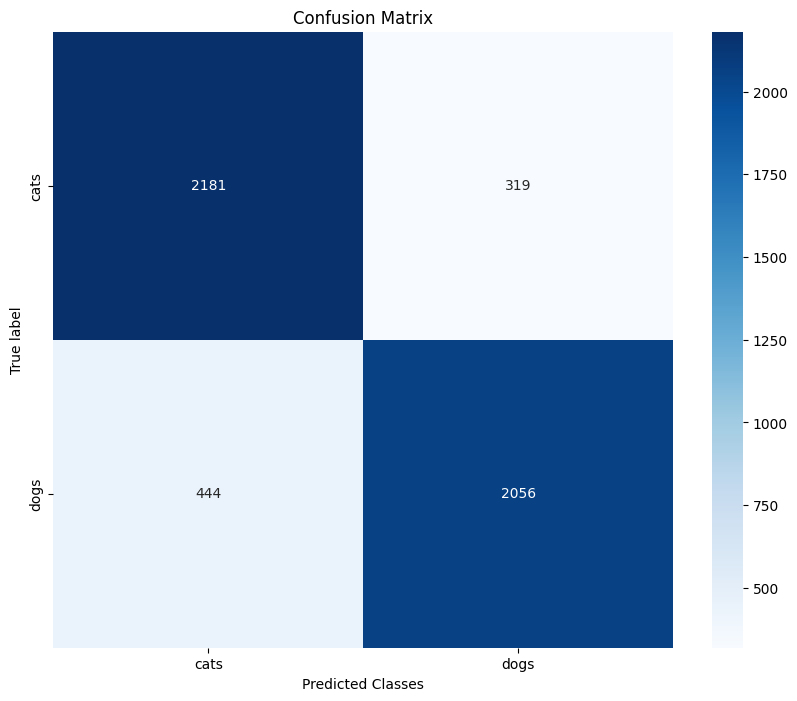

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True, fmt = 'd' , cmap = 'Blues' , xticklabels = class_labels , yticklabels = class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Classes')
plt.ylabel('True label')

plt.show()

## Inferences

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test_accuracy: {accuracy*100:.2f}%")
print(f"Test_loss: {loss:.2f}")

250/250 [==============================] - 10s 40ms/step - loss: 0.5619 - accuracy: 0.8474
Test_accuracy: 84.74%
Test_loss: 0.56


## Single Image Prediction

In [ ]:
def make_prediction(image_path):
    img = load_img(image_path , target_size = (150 , 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis = 0)
    img_array /=255

    prediction = model.predict(img_array)
    print('Prediction: ', prediction)

    # plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # plt.subplot(1,2,2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')

    plt.imshow(img)
    plt.axis('off')

    plt.show()


1/1 [==============================] - 0s 51ms/step
Prediction:  [[0.9992466]]


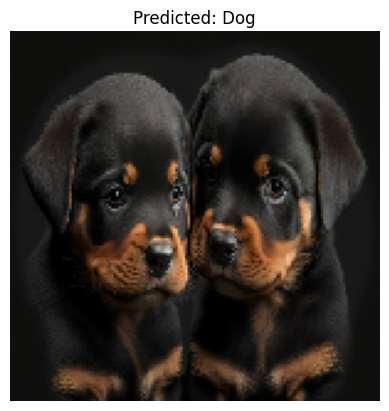

In [ ]:
img_path = '/content/dogimage.jpg'
make_prediction(img_path)